# Practice-SQLite-From-Scratch

## Goal

The Goal of this notebook is to provide an environment based on Jupyter Notebooks (in particular Colab) to practice with the SQL language using SQLite

## Install SQLite (Colab)

In Google Colab, based on linux container need to be installed, run the following cell

In [1]:
!apt-get -y install sqlite3

zsh:1: command not found: apt-get


Let's check if it's installed using the command line

In [2]:
!sqlite3 -version

3.37.1 2021-12-30 15:30:28 378629bf2ea546f73eee84063c5358439a12f7300e433f18c9e1bddd948dea62


## Install ipython magic
Add the %sql and %%sql that allow to connect and run queries in Jupyter cell

NB Colab installs by default this package, version prior to 0.5.0 may have some issue

In [3]:
%pip install ipython-sql

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip list installed | grep -i alchem

SQLAlchemy                        2.0.27


In [5]:
!pip list installed | grep -i ipython-sql

ipython-sql                       0.5.0


### Load the SQL Magic extension

In [6]:
%load_ext sql

## Create a directory to store dataset

In [7]:
# Create Directory
!mkdir -p datasets/

## Create a database

- In SQLite creating a database it's automatic when connecting.
- We will use a database named "sqlite-scratch.db"
- For reproducibility and educational purpose of this notebook we will delete any existing copy of the database, if you want to keep your previous work download the the file and upload again in the dataset directory without running the next cell

In [8]:
# Delete
!rm -f datasets/sqlite-scratch.db

## Connect to the database

In [9]:
%sql sqlite:///datasets/sqlite-scratch.db

Let's check if we are connected, just using the %sql magic commands

In [10]:
%sql

 * sqlite:///datasets/sqlite-scratch.db


## Create Tables

*Exercise*: Create a table "hogwarts_students" with columns (id, name, age). Set id as primary key as column constraint

In [11]:
%%sql
CREATE TABLE IF NOT EXISTS hogwarts_students(
id   INTEGER PRIMARY KEY NOT NULL,
name TEXT    NOT NULL,
age  INTEGER
);

 * sqlite:///datasets/sqlite-scratch.db
Done.


[]

## SQLite schema
- SQLite stores database schema in a table ```sqlite_master```
- To view it, simply run a SELECT query


In [12]:
%%sql
select * from sqlite_master

 * sqlite:///datasets/sqlite-scratch.db
Done.


type,name,tbl_name,rootpage,sql
table,hogwarts_students,hogwarts_students,2,"CREATE TABLE hogwarts_students(id INTEGER PRIMARY KEY NOT NULL,name TEXT NOT NULL,age INTEGER)"


## DROP Table

*Exercise*: Drop table hogwarts_students

In [13]:
%%sql
DROP table IF exists hogwarts_students

 * sqlite:///datasets/sqlite-scratch.db
Done.


[]

## Create table (table constraints)

*Exercise*: Create a table "students" with columns (id, name, age). Set id as primary key as table constraint

In [14]:
%%sql
CREATE TABLE IF NOT EXISTS hogwarts_students(
    id     INTEGER NOT NULL,
    name   TEXT    NOT NULL,
    age    INTEGER,
    PRIMARY KEY(id)
)

 * sqlite:///datasets/sqlite-scratch.db
Done.


[]

### Create table with foreign key
- Foreign Key can be declared explicitly both as column or table constraint 
- They are not "required", relationship exist also without declaring, but it's a good practice
- FK can also manage action triggered by the source tuple (i.e. on DELETE/UPDATE -> CASCADE/DELETE) 

Syntax
```sql
column datatype references references foreigntable(column)
```
[Full syntax](https://www.sqlite.org/syntax/foreign-key-clause.html)

*Exercise*: Create the following relations explicitly defining references between hogwarts_students.house_id and hogwarts_houses.id
- hogwarts_houses(id, name)
- hogwarts_students(id, name, surname, age, city_id)

In [15]:
%%sql
DROP TABLE IF EXISTS hogwarts_houses;
DROP TABLE IF EXISTS hogwarts_students;

 * sqlite:///datasets/sqlite-scratch.db
Done.
Done.


[]

In [16]:
%%sql
CREATE TABLE IF NOT EXISTS hogwarts_houses(
id   INTEGER PRIMARY KEY NOT NULL,
name TEXT    NOT NULL
);

 * sqlite:///datasets/sqlite-scratch.db
Done.


[]

In [17]:
%%sql
CREATE TABLE IF NOT EXISTS hogwarts_students(
id   INTEGER PRIMARY KEY NOT NULL,
name TEXT    NOT NULL,
age  INTEGER,
house_id REFERENCES hogwarts_houses(id)
);

 * sqlite:///datasets/sqlite-scratch.db
Done.


[]

In [18]:
%%sql
select * from sqlite_master

 * sqlite:///datasets/sqlite-scratch.db
Done.


type,name,tbl_name,rootpage,sql
table,hogwarts_houses,hogwarts_houses,2,"CREATE TABLE hogwarts_houses(id INTEGER PRIMARY KEY NOT NULL,name TEXT NOT NULL)"
table,hogwarts_students,hogwarts_students,3,"CREATE TABLE hogwarts_students(id INTEGER PRIMARY KEY NOT NULL,name TEXT NOT NULL,age INTEGER,house_id REFERENCES hogwarts_houses(id))"


# Display Physical Schema

- graphviz
- https://github.com/innovationOUtside/ipython_magic_sqlalchemy_schemadisplay

In [19]:
!apt-get -y install graphviz

zsh:1: command not found: apt-get


In [20]:
%pip install schemadisplay-magic

Note: you may need to restart the kernel to use updated packages.


In [21]:
%load_ext schemadisplay_magic

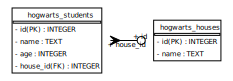

In [22]:
%schema --connection_string sqlite:///datasets/sqlite-scratch.db

Back to Theory for ALTER TABLE

## ALTER Table

*Exercise*: 
- Add a column gender in hogwarts_students table
- Rename hogwarts_houses in houses 
- Rename hogwarts_students in students 

In [23]:
%%sql
ALTER TABLE hogwarts_students ADD column gender TEXT

 * sqlite:///datasets/sqlite-scratch.db
Done.


[]

In [24]:
%%sql
ALTER TABLE hogwarts_houses RENAME to houses;
ALTER TABLE hogwarts_students RENAME to students;

 * sqlite:///datasets/sqlite-scratch.db
Done.
Done.


[]

Back to Theory for DML

## Insert into a table (specifying columns)

*Exercise*: 
- Insert Gryffindor, Slytherin  in the houses table

nb
Since id is primary key, in sqlite it's automatically created with rowid, so we don't need to specify in the column list

In [25]:
%%sql 
INSERT into houses(name) 
VALUES 
('Gryffindor'),
('Slytherin')

 * sqlite:///datasets/sqlite-scratch.db
2 rows affected.


[]

Check if rows are inserted 

In [26]:
%%sql
select * from houses

 * sqlite:///datasets/sqlite-scratch.db
Done.


id,name
1,Gryffindor
2,Slytherin


## CREATE Table Default and Unique
- As column constraint it's possible to set a default value for the column using DEFAULT keywork
- This setting allows to insert into a table without specifying the columns, if not present a NULL values is set, if the column is defined as NOT NULL, an error arise
- A table constraint can also check if multiple columns are UNIQUE

*Exercise*: 
Albus Silente needs a table to check that all Hogwarts have perfomed the OWL exams.
- Create a single table having
    - student name: text not null (eg. "Harry Potter")
    - class name: text not null (eg. "Defence Against the Dark Arts")
    - grade: integer default 0 
- Add a table constraint to check UNIQUE on student name, class name

In [27]:
%%sql
DROP TABLE IF EXISTS owl_records;
CREATE TABLE IF NOT EXISTS owl_records(
student TEXT NOT NULL,
class   TEXT NOT NULL,
grade  NUMBER DEFAULT 0,
UNIQUE (student,class)
)

 * sqlite:///datasets/sqlite-scratch.db
Done.
Done.


[]

In [28]:
%%sql
insert into owl_records(student, class)
values
('Harry Potter', 'Defence Against the Dark Arts')

 * sqlite:///datasets/sqlite-scratch.db
1 rows affected.


[]

Check Records

In [29]:
%%sql
select * from owl_records

 * sqlite:///datasets/sqlite-scratch.db
Done.


student,class,grade
Harry Potter,Defence Against the Dark Arts,0


Run again the insert query to check unique constraint


## INSERT INTO ... SELECT

*Exercise*: 
Prof. Mcgonagal needs to create a list of students,
- Insert into the students using select into
- Bonus add a where clause in the select to avoid repetitions

In [30]:
%%sql
insert into students(name) select distinct student from owl_records

 * sqlite:///datasets/sqlite-scratch.db
1 rows affected.


[]

In [31]:
%%sql
select * from students

 * sqlite:///datasets/sqlite-scratch.db
Done.


id,name,age,house_id,gender
1,Harry Potter,None,None,None


In [33]:
%%sql
insert into owl_records(student, class)
values
('Hermione Granger', 'Defence Against the Dark Arts')

 * sqlite:///datasets/sqlite-scratch.db
1 rows affected.


[]

In [34]:
%%sql
insert into students(name) select distinct student from owl_records 
where student not in (select name from students);


 * sqlite:///datasets/sqlite-scratch.db
1 rows affected.


[]

In [35]:
%%sql
select * from students


 * sqlite:///datasets/sqlite-scratch.db
Done.


id,name,age,house_id,gender
1,Harry Potter,None,None,None
2,Hermione Granger,None,None,None


In [37]:
%%sql
select * from owl_records


 * sqlite:///datasets/sqlite-scratch.db
Done.


student,class,grade
Harry Potter,Defence Against the Dark Arts,0
Hermione Granger,Defence Against the Dark Arts,0


## DELETE

*Exercise*: 
Fred and George want to leave the school to open a magic chop
- Insert and delete them into the students table

In [38]:
%%sql
insert into students(name) values ('Fred'),('George')


 * sqlite:///datasets/sqlite-scratch.db
2 rows affected.


[]

In [41]:
%%sql 
delete from students where name in ('Fred','George')

 * sqlite:///datasets/sqlite-scratch.db
2 rows affected.


[]

*Exercise*: 
Peeves does a prank:
- Delete all records in owl_records table

In [42]:
%%sql 
delete from owl_records

 * sqlite:///datasets/sqlite-scratch.db
2 rows affected.


[]

## UPDATE

*Exercise*: In the Sorting Hat ceremony, Harry and Hermione are assigned to Gryffindor house:
- update students table accordingly 


In [43]:
%%sql 
select * from houses

 * sqlite:///datasets/sqlite-scratch.db
Done.


id,name
1,Gryffindor
2,Slytherin


In [45]:
%%sql 
update students set house_id=1 where name in ('Harry Potter','Hermione Granger')

 * sqlite:///datasets/sqlite-scratch.db
2 rows affected.


[]

## Close connection

In [39]:
%sql -l

{'sqlite:///datasets/sqlite-scratch.db': <sql.connection.Connection at 0x7c072f9bacb0>}

In [40]:
%sql -x sqlite:///datasets/sqlite-scratch.db